# 多分类问题

## 手写数字识别

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
data = sio.loadmat('Logistic Regression_3.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
raw_X=data['X']

In [8]:
raw_y=data['y']

In [9]:
print(raw_X.shape,raw_y.shape)

(5000, 400) (5000, 1)


In [54]:
def plot_an_image(X):
    
    pick_one=np.random.randint(5000)
    
    image=X[pick_one,:]
    
    fig,ax=plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])


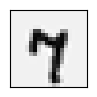

In [56]:
plot_an_image(raw_X)

In [64]:
def plot_100_image(X):
    
    sample_index=np.random.choice(len(X),100)
    images=X[sample_index,:]
    print(images.shape)
    
    fig,ax=plt.subplots(ncols=10,nrows=10,figsize=(8,8,),sharex=True,sharey=True)
    
    for r in range(10):
        for c in range(10):
            
            ax[r,c].imshow(images[10*r+c].reshape(20,20).T,cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])
    
    plt.show

(100, 400)


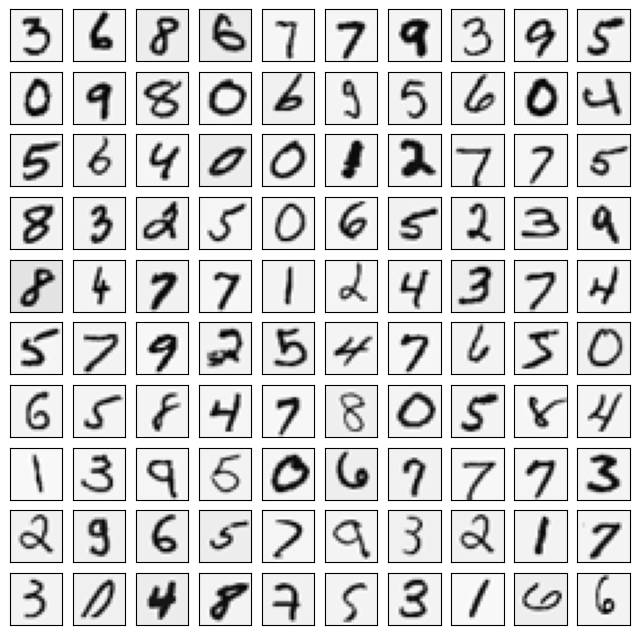

In [65]:
plot_100_image(raw_X)

In [66]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [67]:
def costFunction(theta,X,y,lamda):
    
    first=y*np.log(sigmoid(X@theta))
    second=(1-y)*np.log(1-sigmoid(X@theta))
    
    reg=theta[1:]@theta[1:]*(lamda/(2*len(X)))
    return -np.sum(first+second)/len(X)+reg

In [70]:
def gradient_reg(theta,X,y,lamda):
    reg=theta[1:]*(lamda/len(X))
    reg=np.insert(reg,0,values=0,axis=0)
    
    first=(X.T@(sigmoid(X@theta)-y))/len(X)
    
    return first+reg

In [71]:
X=np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [73]:
y=raw_y.flatten()
y.shape

(5000,)

In [79]:
from scipy.optimize import minimize

def one_vs_all(X,y,lamda,K):
    
    n=X.shape[1]
    
    theta_all=np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i=np.zeros(n,)
        
        res=minimize(fun=costFunction,x0=theta_i,args=(X,y==i,lamda),method='TNC',jac=gradient_reg)
        theta_all[i-1,:]=res.x
        
    return theta_all

In [80]:
lamda=1
K=10

In [81]:
theta_final=one_vs_all(X,y,lamda,K)

In [83]:
theta_final

array([[-2.38187334e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30433279e-03, -7.29580949e-10,  0.00000000e+00],
       [-3.18303389e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46340729e-03, -5.08870029e-04,  0.00000000e+00],
       [-4.79638233e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87468695e-05, -2.47395863e-07,  0.00000000e+00],
       ...,
       [-7.98700752e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94576566e-05,  7.21256372e-06,  0.00000000e+00],
       [-4.57358931e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33390955e-03,  9.96868542e-05,  0.00000000e+00],
       [-5.40542751e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16613537e-04,  7.88124085e-06,  0.00000000e+00]])

In [84]:
def predict(X,theta_final):
    
    h=sigmoid(X@theta_final.T)
    
    h_argmax=np.argmax(h,axis=1)
    
    return h_argmax+1

In [85]:
y_pred=predict(X,theta_final)

In [86]:
acc=np.mean(y_pred==y)

In [87]:
acc

0.9446

In [217]:
def plot_an_image_test(X,X_2):
    
    pick_test=np.random.randint(5000)
    
    image=X[pick_test,:]
    
    fig,ax=plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])

    
    test_result=sigmoid(X_2[pick_test,:]@theta_final.T)
    test_answer=np.argmax(test_result)
    
    print(f"数字判断为",(0 if test_answer+1==10 else test_answer+1))

数字判断为 9
数字判断为 0
数字判断为 2
数字判断为 0
数字判断为 1
数字判断为 4
数字判断为 1
数字判断为 6
数字判断为 2
数字判断为 2


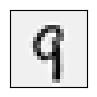

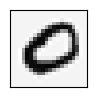

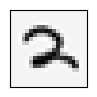

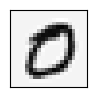

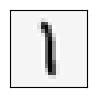

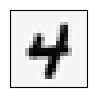

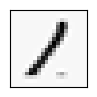

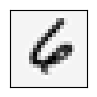

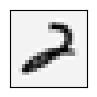

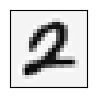

In [228]:
for i in range(10): 
    plot_an_image_test(raw_X,X)